<a href="https://colab.research.google.com/github/Rangulov/PhMathInfo/blob/main/Dimensionality_reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Подготовка датасета

In [1]:
# Импортируем библиотеки

import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

In [4]:
# Присвоим переменной «url» ссылку на датасет:

url = 'moible.csv'

# создаем лист с названием столбцов:

cols = ["battery_power","blue","clock_speed","dual_sim","fc","four_g","int_memory","m_dep","mobile_wt","n_cores","pc","px_height","px_width","ram","sc_h","sc_w","talk_time","three_g","touch_screen","wifi","price_range"]

# используем Pandas read_csv():

dataset = pd.read_csv(url, names = cols)

*   battery_power - Общий объём энергии, который аккумулятор может накопить за один раз, измеряется в мАч
*   blue - Есть Bluetooth или нет
*   clock_speed - скорость, с которой микропроцессор выполняет инструкции
*   dual_sim - Поддерживает ли он две SIM-карты
*   fc - Мегапиксели фронтальной камеры
*   four_g - Есть 4G или нет
*   int_memory - Внутренняя память в гигабайтах
*   m_dep - Глубина телефона в см
*   mobile_wt - Вес мобильного телефона
*   n_cores - Количество ядер процессора
*   pc - Мегапиксели основной камеры
*   px_height - Высота разрешения в пикселях
*   px_width - Ширина разрешения в пикселях
*   ram - Оперативная память в мегабайтах
*   sc_h - Высота экрана мобильного телефона в см
*   sc_w - Ширина экрана мобильного телефона в см
*   talk_time - Максимальное время работы от одного заряда аккумулятора
*   three_g - Есть 3G или нет
*   touch_screen - Есть сенсорный экран или нет
*   wifi - Есть Wi-Fi или нет
*   price_range - ценовой диапазон
    * 0 - дешевый
    * 1 - нормальный
    * 2 - средний
    * 3 - дорогой







In [5]:
dataset.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [6]:
vals = dataset["price_range"].unique()
vals

array([1, 2, 3, 0])

In [10]:
cols_for_clusters = ["battery_power","blue","clock_speed","dual_sim","fc","four_g","int_memory","m_dep","mobile_wt","n_cores","pc","px_height","px_width","ram","sc_h","sc_w","talk_time","three_g","touch_screen","wifi"]

df= dataset[cols_for_clusters].copy()

In [11]:
X = df
y = dataset["price_range"]
yvals = dataset["price_range"]

# Линейные методы уменьшения размерности (Linear Dimensionality Reduction Methods)



### Метод главных компонентов (Principal Component Analysis, PCA)



In [12]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA

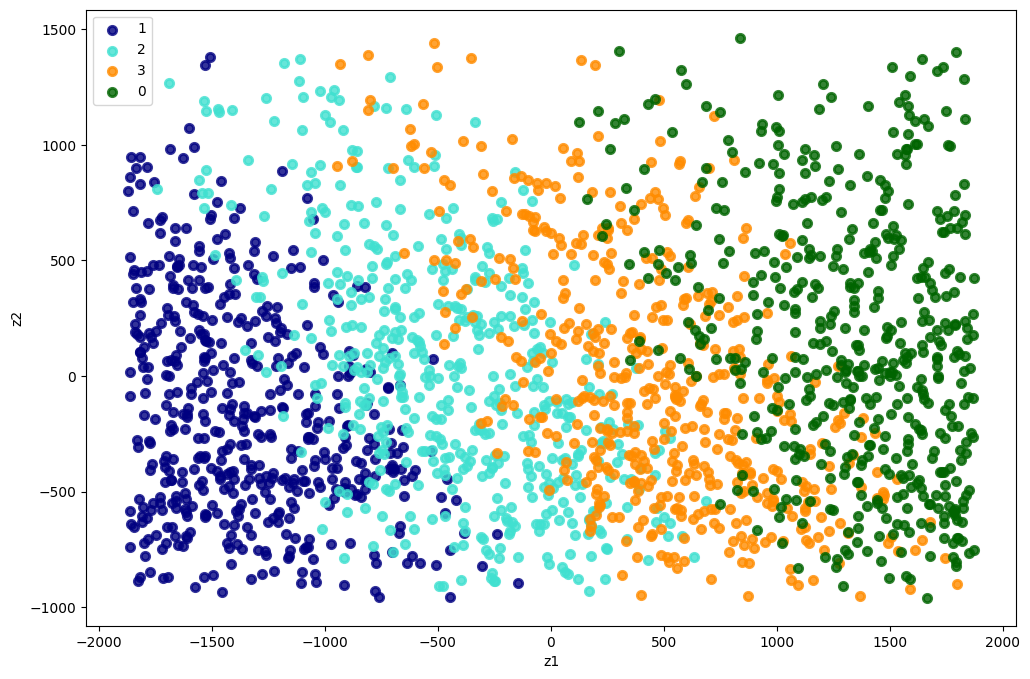

In [17]:
pca = PCA(n_components=2)
X_new = pca.fit(X).transform(X)


plt.figure(figsize=(12,8))
colors = ["navy", "turquoise", "darkorange", "darkgreen"]
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2, 3], cols_for_clusters):
    plt.scatter(
        X_new[y == i, 0], X_new[y == i, 1], color=color, alpha=0.8, lw=lw, label=vals[i]
    )

plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.xlabel("z1")
plt.ylabel("z2")
plt.show()

In [18]:
pca.explained_variance_ratio_

array([0.67043941, 0.16517913])



### Независисый анализ компонентов (Independent Component Analysis, ICA)



In [19]:
from sklearn.decomposition import FastICA

fast_ica = FastICA(n_components=2)
X_new = fast_ica.fit_transform(X)

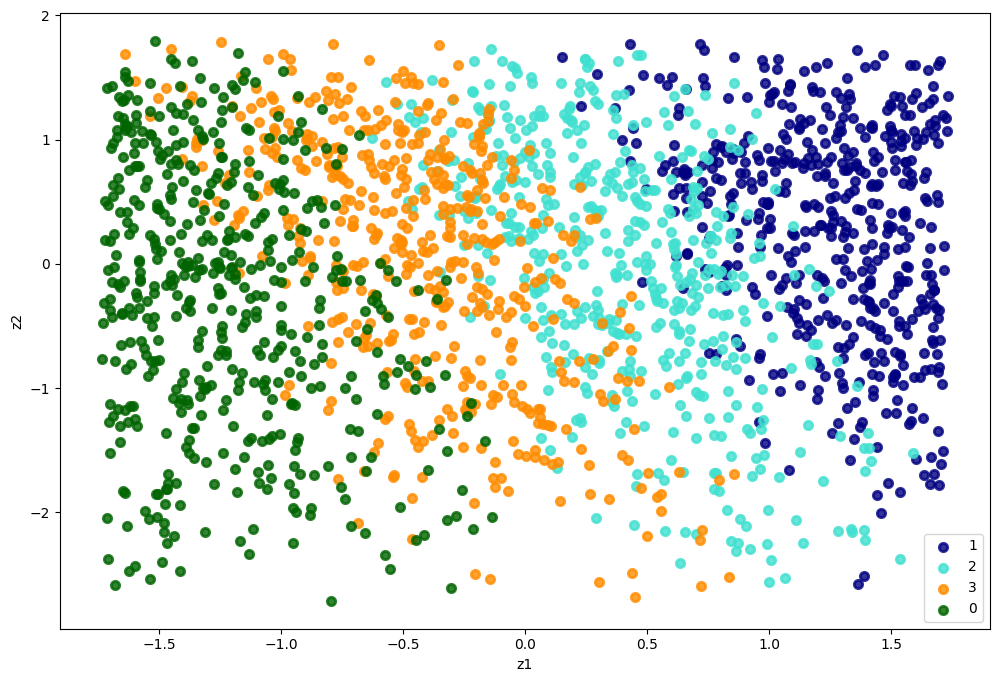

In [20]:
plt.figure(figsize=(12,8))
colors = ["navy", "turquoise", "darkorange", "darkgreen"]
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2, 3], cols_for_clusters):
    plt.scatter(
        X_new[y == i, 0], X_new[y == i, 1], color=color, alpha=0.8, lw=lw, label=vals[i]
    )

plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.xlabel("z1")
plt.ylabel("z2")
plt.show()

#Нелинейные методы уменьшения размерности


### Kernel PCA


In [137]:
from sklearn.decomposition import KernelPCA

rbf_pca = KernelPCA(n_components=2, kernel='rbf', gamma=0.04)
X_new = rbf_pca.fit_transform(X)

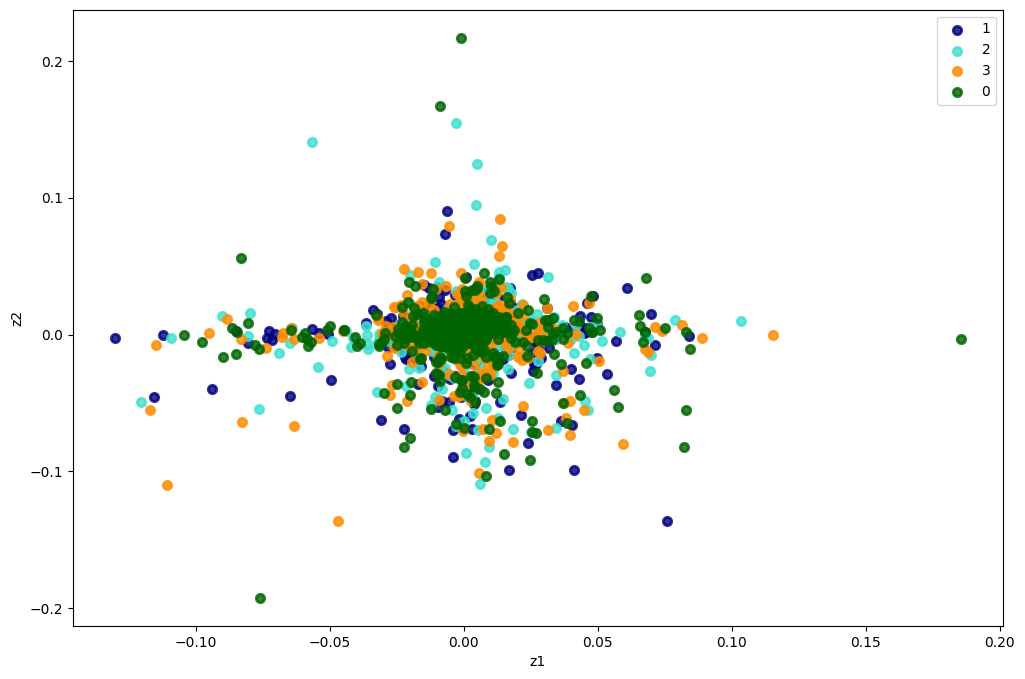

In [22]:
plt.figure(figsize=(12,8))
colors = ["navy", "turquoise", "darkorange", "darkgreen"]
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2, 3], cols_for_clusters):
    plt.scatter(
        X_new[y == i, 0], X_new[y == i, 1], color=color, alpha=0.8, lw=lw, label=vals[i]
    )

plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.xlabel("z1")
plt.ylabel("z2")
plt.show()

### tSNE


In [23]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
X_new = tsne.fit_transform(X)

In [24]:
# Вывод результатов
print('Initial Shape of X: ', X.shape)
print('New Shape of X: ', X_new.shape)
print('Kullback-Leibler divergence after optimization: ', tsne.kl_divergence_)
print('No. of iterations: ', tsne.n_iter_)
#print('Embedding vectors: ', tsne.embedding_)

Initial Shape of X:  (2000, 20)
New Shape of X:  (2000, 2)
Kullback-Leibler divergence after optimization:  1.1325111389160156
No. of iterations:  999


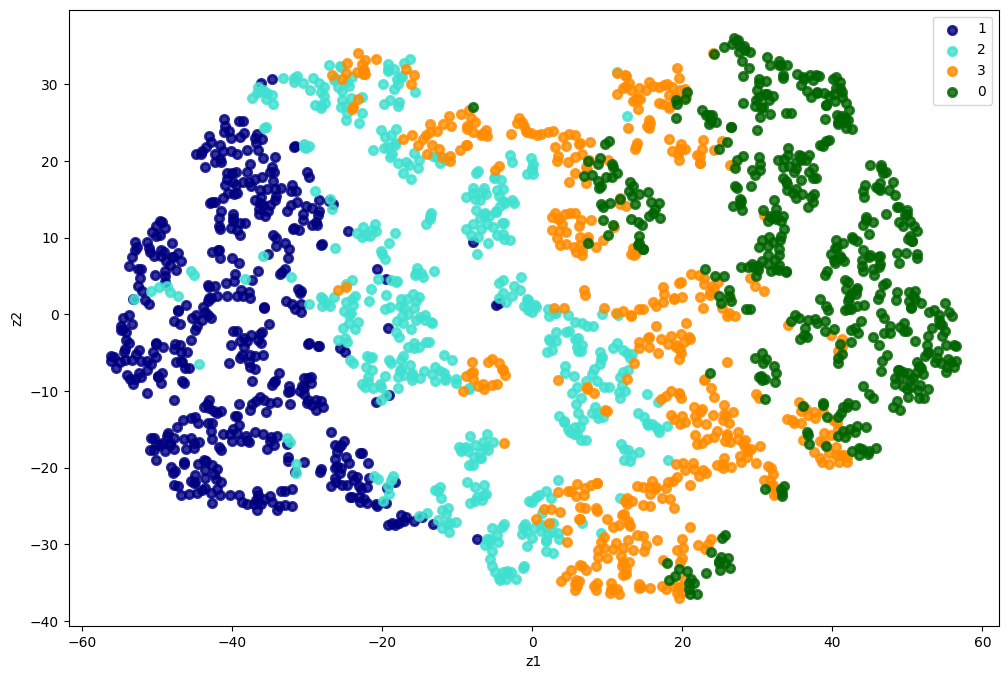

In [25]:
plt.figure(figsize=(12,8))
colors = ["navy", "turquoise", "darkorange", "darkgreen"]
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2, 3], cols_for_clusters):
    plt.scatter(
        X_new[y == i, 0], X_new[y == i, 1], color=color, alpha=0.8, lw=lw, label=vals[i]
    )

plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.xlabel("z1")
plt.ylabel("z2")
plt.show()

# Поиск выбросов. DBSCAN



## DBSCAN для кластеризации

In [26]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.metrics import v_measure_score

In [130]:
dbscan_cluster1 = DBSCAN(eps = 290, min_samples = 3)
X_new = dbscan_cluster1.fit(X)

In [131]:
# Number of Clusters
labels=dbscan_cluster1.labels_
N_clus=len(set(labels))-(1 if -1 in labels else 0)
print('Estimated no. of clusters: %d' % N_clus)

# Identify Noise
n_noise = list(dbscan_cluster1.labels_).count(-1)
print('Estimated no. of noise points: %d' % n_noise)

# Calculating v_measure
print('v_measure =', v_measure_score(y, labels))

Estimated no. of clusters: 6
Estimated no. of noise points: 81
v_measure = 0.023165480907684995


/tmp/ipython-input-4047694286.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc="best", shadow=False, scatterpoints=2)


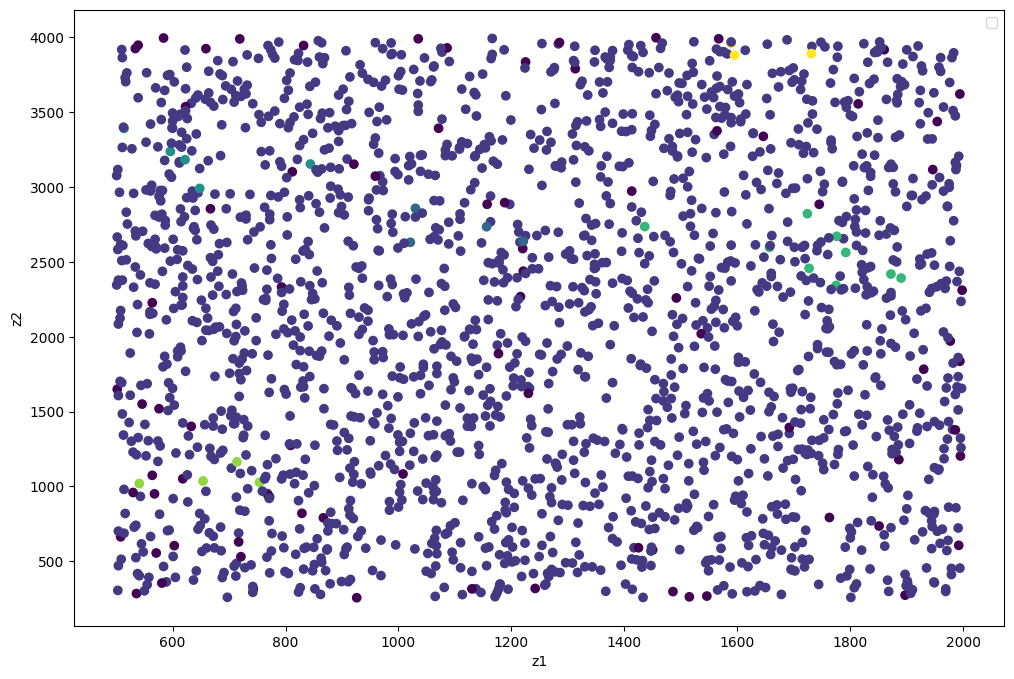

In [133]:
plt.figure(figsize=(12,8))
colors = ["navy", "turquoise", "darkorange","darkgreen"]
lw = 2

plt.scatter(
        X[cols[0]], X[cols[13]],c=dbscan_cluster1.labels_
    )

plt.legend(loc="best", shadow=False, scatterpoints=2)
plt.xlabel("z1")
plt.ylabel("z2")
plt.show()

In [115]:
from sklearn.neighbors import NearestNeighbors

min_samples = 3

knn = NearestNeighbors(n_neighbors = min_samples, metric = 'l2')
knn.fit(X)

dists, inds = knn.kneighbors(X)
dists_ar = dists[:, 1:min_samples].mean(axis=1)
dists_ar.sort()

In [116]:
import sklearn
#возможные метрики расстояния
sklearn.metrics.pairwise.distance_metrics()

{'cityblock': <function sklearn.metrics.pairwise.manhattan_distances(X, Y=None)>,
 'cosine': <function sklearn.metrics.pairwise.cosine_distances(X, Y=None)>,
 'euclidean': <function sklearn.metrics.pairwise.euclidean_distances(X, Y=None, *, Y_norm_squared=None, squared=False, X_norm_squared=None)>,
 'haversine': <function sklearn.metrics.pairwise.haversine_distances(X, Y=None)>,
 'l2': <function sklearn.metrics.pairwise.euclidean_distances(X, Y=None, *, Y_norm_squared=None, squared=False, X_norm_squared=None)>,
 'l1': <function sklearn.metrics.pairwise.manhattan_distances(X, Y=None)>,
 'manhattan': <function sklearn.metrics.pairwise.manhattan_distances(X, Y=None)>,
 'precomputed': None,
 'nan_euclidean': <function sklearn.metrics.pairwise.nan_euclidean_distances(X, Y=None, *, squared=False, missing_values=nan, copy=True)>}

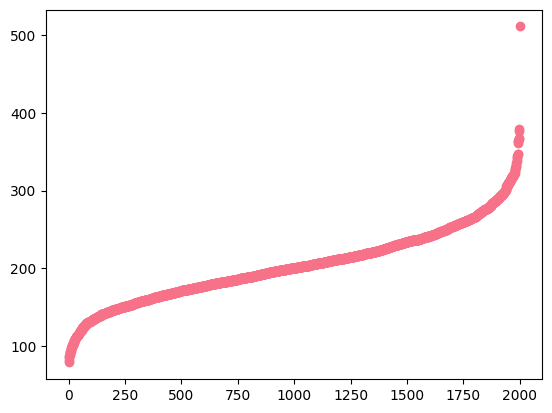

In [117]:
plt.scatter(x = range(len(dists_ar)), y=dists_ar)
plt.show()

## DBSCAN для определения выбросов

In [118]:
dbscan = DBSCAN(eps = 290, min_samples = min_samples)
print(dbscan)

DBSCAN(eps=290, min_samples=3)


In [119]:
pred = dbscan.fit_predict(X)

In [120]:
# Number of Clusters
labels=dbscan.labels_
N_clus=len(set(labels))-(1 if -1 in labels else 0)
print('Estimated no. of clusters: %d' % N_clus)

# Identify Noise
n_noise = list(dbscan.labels_).count(-1)
print('Estimated no. of noise points: %d' % n_noise)

# Calculating v_measure
print('v_measure =', v_measure_score(y, labels))

Estimated no. of clusters: 6
Estimated no. of noise points: 81
v_measure = 0.023165480907684995


In [121]:
# у анномалий - класс -1, ищем все номера строк с таким классом, потом отбираем эти строки из начального набора данных

anom_index = [i for i in range(len(pred)) if pred[i] == -1]
values = X.loc[anom_index]

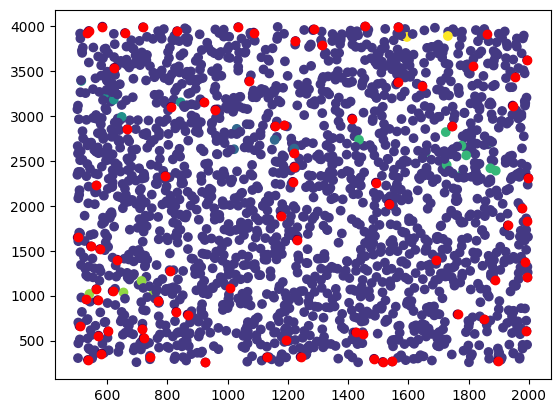

In [126]:
plt.scatter( X[cols[0]], X[cols[13]],c=dbscan_cluster1.labels_)
plt.scatter(values[cols[0]], values[cols[13]], color='r')
plt.show()